## Homework 05: due 2022/05/18 23:59(100%)

### - There are differences between every OpenCV version, please use the version 4.4.0.40 to avoid generating bugs.  

### - Tutorial : 
1. Feature extraction and matching: https://docs.opencv.org/4.4.0/db/d27/tutorial_py_table_of_contents_feature2d.html
2. Feature detectors (ORB & FAST): https://medium.com/data-breach/introduction-to-orb-oriented-fast-and-rotated-brief-4220e8ec40cf 
                   
### - After you go through the tutorials, you should be able to work on this assignment.

### - Please answer the following questions and work directly on this jupyter notebook.

### - Make sure the code can be run and show the result and figures properly.

### - Please write down your observation with markdown in this notebook briefly.

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#### 1. Feature detector (40%)
##### Please use the following feature detectors (FAST, ORB, SIFT) and draw the feature points on the __test1.jpg__ images.
###### (Example figure)
![figure1.jpg](https://github.com/tingyan08/Deep-Learning-and-Computer-Vision/blob/main/HW5/fig/figure1.jpg?raw=true)

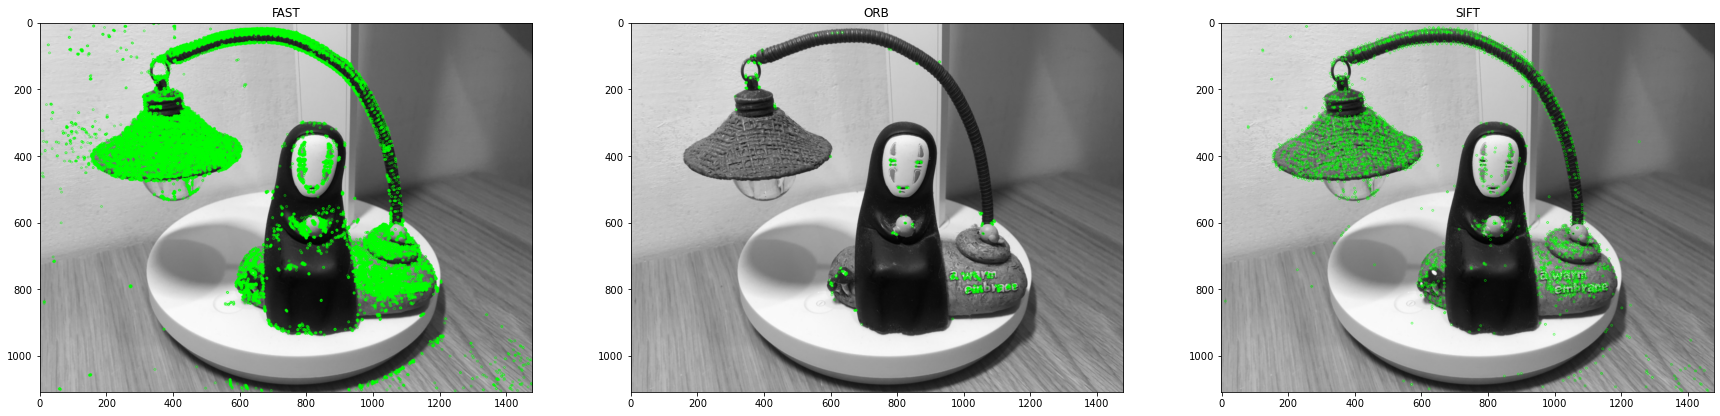

In [25]:
img_1 = cv2.imread('test1.jpg',0)
img_2 = cv2.imread('test2.jpg',0)

training_image = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
training_gray = cv2.cvtColor(training_image, cv2.COLOR_RGB2GRAY)

test_image = cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB)
test_gray = cv2.cvtColor(test_image, cv2.COLOR_RGB2GRAY)

fast = cv2.FastFeatureDetector_create()
orb = cv2.ORB_create()
sift = cv2.SIFT_create()

fast.setNonmaxSuppression(0)
kp_fast = fast.detect(img_1,None)
img1 = cv2.drawKeypoints(img_1, kp_fast, None, color=(0,255,0))

kp_orb = orb.detect(img_1,None)
kp_orb, des = orb.compute(img_1, kp_orb)
img2 = cv2.drawKeypoints(img_1, kp_orb, None, color=(0,255,0), flags=0)

kp_sift = sift.detect(img_1,None)
img3=cv2.drawKeypoints(img_1,kp_sift, None, color=(0,255,0))

fx, plots = plt.subplots(1,3,figsize=(30,20))
plots[0].set_title('FAST')
plots[0].imshow(img1)

plots[1].set_title('ORB')
plots[1].imshow(img2)

plots[2].set_title('SIFT')
plots[2].imshow(img3)

#### 2. Feature matching (60%)
##### Please match the feature points from the __test1.jpg__ and __test2.jpg__.Also, please apply Lowe's ratio test (with ratio 0.6 and 0.8) to match the features and observe the differences when adjusting the ratio.
##### 2.1 Please use __SIFT__ as feature detector and descriptor.(30%) 
###### (Example figure)
![figure2.jpg](https://github.com/tingyan08/Deep-Learning-and-Computer-Vision/blob/main/HW5/fig/figure2.jpg?raw=true)


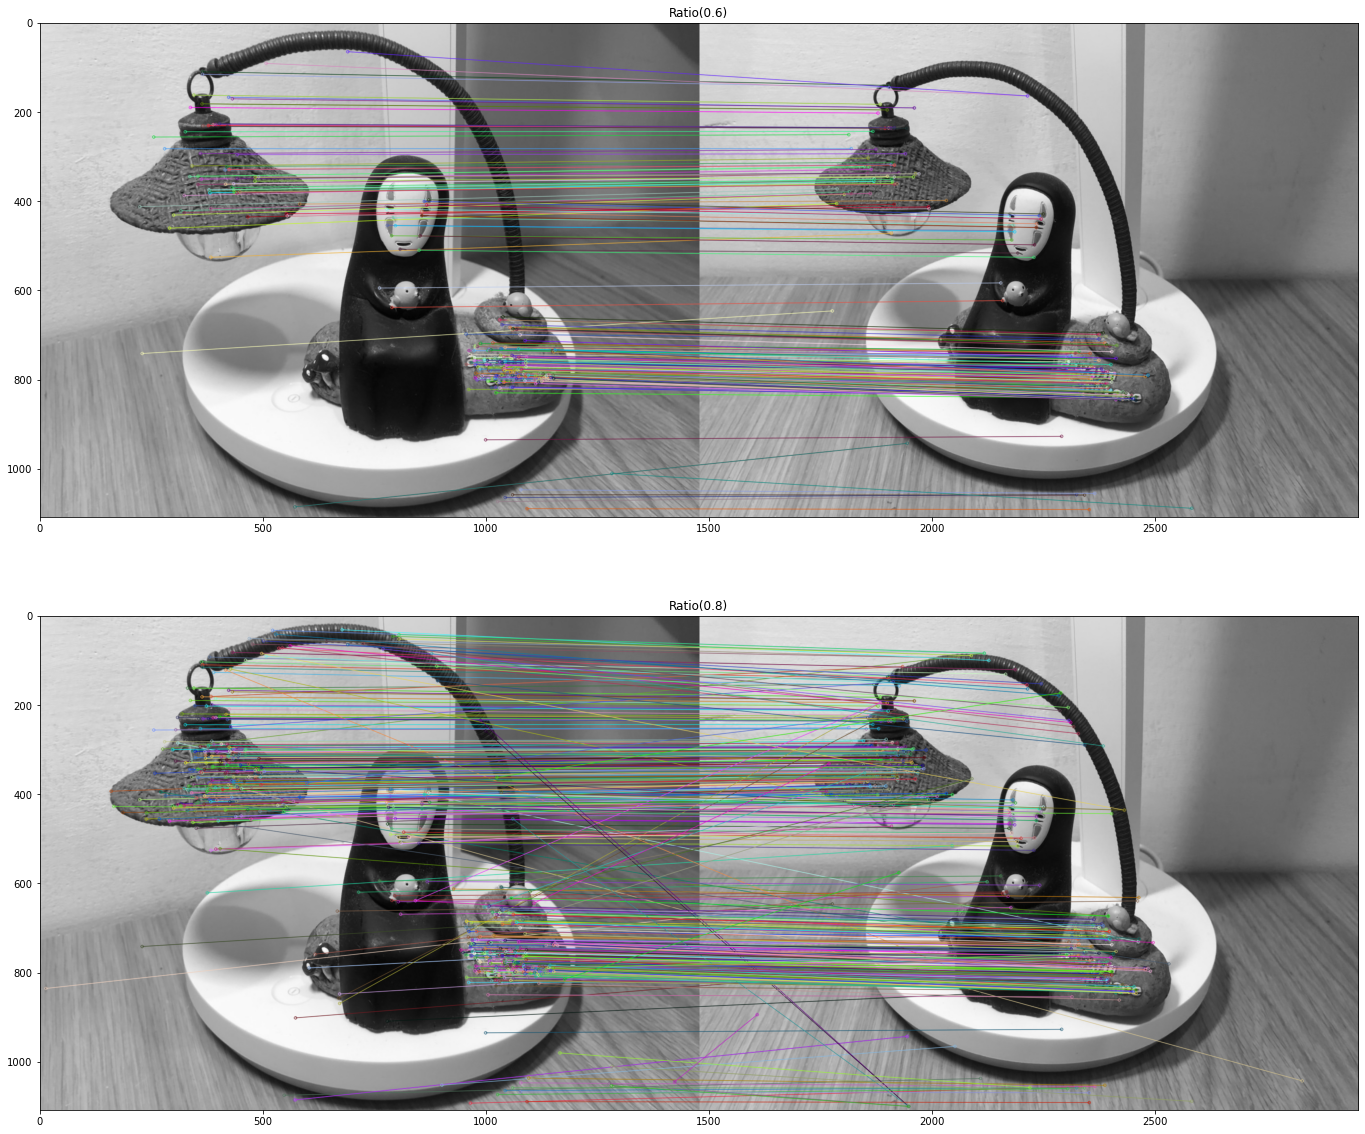

In [35]:
train_keypoints, train_descriptor = sift.detectAndCompute(training_gray, None)
test_keypoints, test_descriptor = sift.detectAndCompute(test_gray, None)

bf = cv2.BFMatcher()
matches = bf.knnMatch(train_descriptor,test_descriptor,k=2)

ratio0_6 = []
for m,n in matches:
    if m.distance < 0.6*n.distance:
        ratio0_6.append([m])
        
ratio0_8 = []
for m,n in matches:
    if m.distance < 0.8*n.distance:
        ratio0_8.append([m])


result1 = cv2.drawMatchesKnn(training_image, train_keypoints, test_gray, test_keypoints, ratio0_6, test_gray, flags = 2)
result2 = cv2.drawMatchesKnn(training_image, train_keypoints, test_gray, test_keypoints, ratio0_8, test_gray, flags = 2)

fx, plots = plt.subplots(2,1,figsize=(30,20))
plots[0].set_title('Ratio(0.6)')
plots[0].imshow(result1)
plots[1].set_title('Ratio(0.8)')
plots[1].imshow(result2)

##### 2.2 Please use __ORB__ as feature detector and descriptor.(30%) 
###### (Example figure)
![figure3.jpg](https://github.com/tingyan08/Deep-Learning-and-Computer-Vision/blob/main/HW5/fig/figure3.jpg?raw=true)

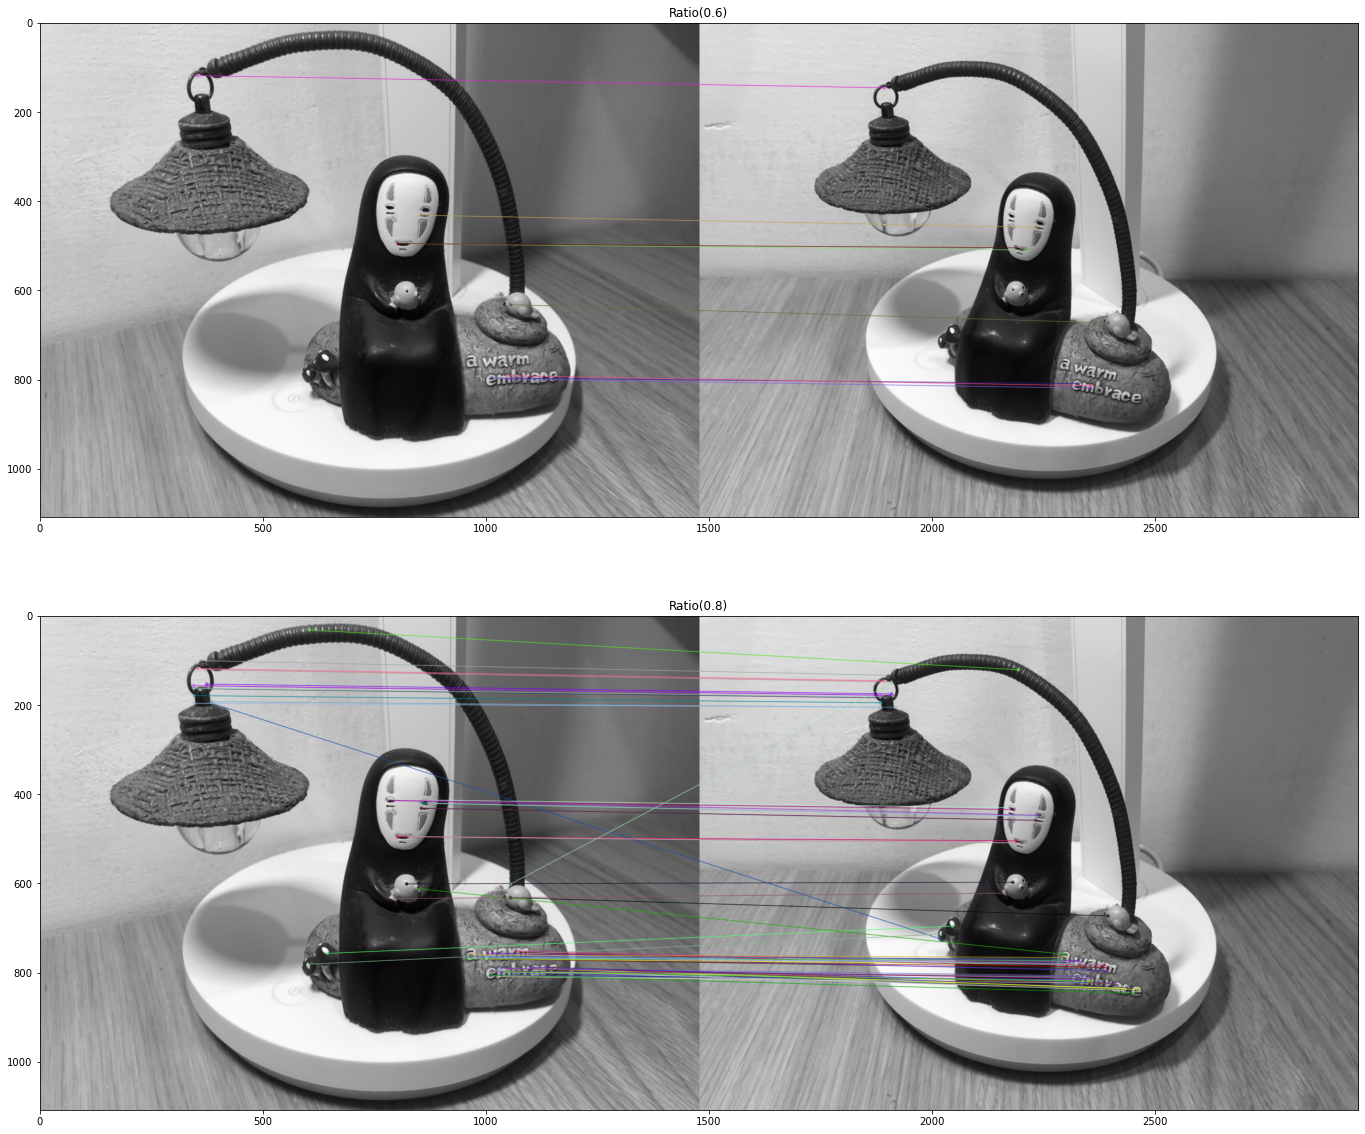

In [33]:
train_keypoints, train_descriptor = orb.detectAndCompute(training_gray, None)
test_keypoints, test_descriptor = orb.detectAndCompute(test_gray, None)

bf = cv2.BFMatcher()
matches = bf.knnMatch(train_descriptor,test_descriptor,k=2)

ratio0_6 = []
for m,n in matches:
    if m.distance < 0.6*n.distance:
        ratio0_6.append([m])
        
ratio0_8 = []
for m,n in matches:
    if m.distance < 0.8*n.distance:
        ratio0_8.append([m])
        

result1 = cv2.drawMatchesKnn(training_gray, train_keypoints, test_gray, test_keypoints, ratio0_6, None, flags = cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
result2 = cv2.drawMatchesKnn(training_gray, train_keypoints, test_gray, test_keypoints, ratio0_8, None, flags = cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

fx, plots = plt.subplots(2,1,figsize=(30,20))
plots[0].set_title('Ratio(0.6)')
plots[0].imshow(result1)
plots[1].set_title('Ratio(0.8)')
plots[1].imshow(result2)